In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

###  *In this notebook, we are going to get basic understanding of the csv files and the images provided in the dataset*

In [2]:
# PATHS
TRAIN_IMAGES = "../input/hubmap-organ-segmentation/train_images/*.tiff"
TRAIN_CSV = "../input/hubmap-organ-segmentation/train.csv"
TEST_CSV = "../input/hubmap-organ-segmentation/test.csv"

## Analyzing csv files

In [3]:
train_df = pd.read_csv(TRAIN_CSV)
train_df.head()

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female


In [4]:
train_df.shape

(351, 10)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                351 non-null    int64  
 1   organ             351 non-null    object 
 2   data_source       351 non-null    object 
 3   img_height        351 non-null    int64  
 4   img_width         351 non-null    int64  
 5   pixel_size        351 non-null    float64
 6   tissue_thickness  351 non-null    int64  
 7   rle               351 non-null    object 
 8   age               351 non-null    float64
 9   sex               351 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 27.5+ KB


[]

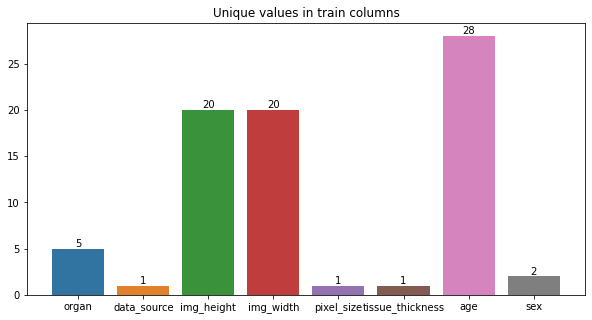

In [6]:
plt.figure(figsize=(10,5))
plt.title("Unique values in train columns")
unique_counts = train_df[[i for i in train_df.columns if i not in ["id","rle"]]].nunique().to_dict()
ax = sns.barplot(list(unique_counts.keys()), list(unique_counts.values()))
ax.bar_label(ax.containers[0])
plt.plot()

In [7]:
for i in ["organ","data_source","pixel_size","tissue_thickness","sex"]:
    print(train_df[i].value_counts())

kidney            99
prostate          93
largeintestine    58
spleen            53
lung              48
Name: organ, dtype: int64
HPA    351
Name: data_source, dtype: int64
0.4    351
Name: pixel_size, dtype: int64
4    351
Name: tissue_thickness, dtype: int64
Male      229
Female    122
Name: sex, dtype: int64


[Text(0, 0, '65.2422'), Text(0, 0, '34.7578')]

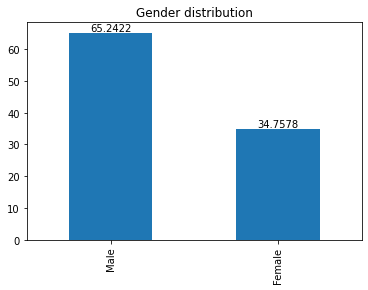

In [8]:
plt.title("Gender distribution")
ax = train_df[i].value_counts("%").mul(100).plot.bar()
ax.bar_label(ax.containers[0])

* #### The columns: "data_source","pixel_size","tissue_thickness" have only single unique value
* #### Column Sex has Male and Female
* #### Column organ has 5 unique values

In [9]:
train_df["age"].describe

<bound method NDFrame.describe of 0      37.0
1      76.0
2      82.0
3      78.0
4      21.0
       ... 
346    61.0
347    28.0
348    84.0
349    28.0
350    84.0
Name: age, Length: 351, dtype: float64>

<AxesSubplot:title={'center':'Age distribution'}, xlabel='age'>

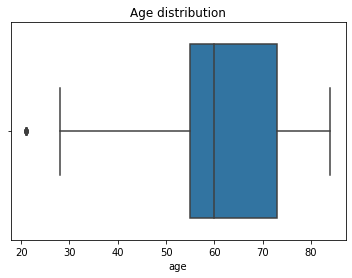

In [10]:
plt.title("Age distribution")
sns.boxplot(x=train_df["age"])

<AxesSubplot:title={'center':'Gender wise age distribution'}, xlabel='age', ylabel='sex'>

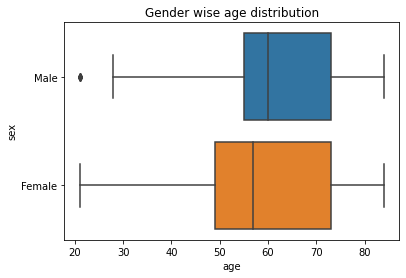

In [11]:
plt.title("Gender wise age distribution")
sns.boxplot(x="age", y="sex",data=train_df)

In [12]:
train_df["img_height"].value_counts() # all are high resolution squared images 

3000    326
2631      2
2416      2
2942      2
2790      2
2764      2
2654      2
2539      1
2680      1
2727      1
2308      1
2867      1
2783      1
2869      1
2760      1
2630      1
2511      1
2593      1
2675      1
3070      1
Name: img_height, dtype: int64

In [13]:
# Test file: single value
test_df = pd.read_csv(TEST_CSV)
test_df.head()

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness
0,10078,spleen,Hubmap,2023,2023,0.4945,4



## Visualizing images

In [14]:
#https://www.kaggle.com/code/pestipeti/decoding-rle-masks/notebook
def rle2mask(mask_rle, shape=(3000,3000)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0::2], s[1::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

Original images


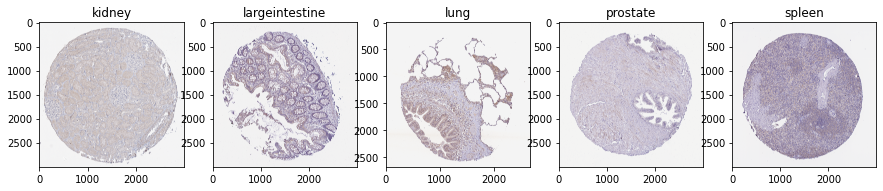

In [15]:
print("Original images")
organs_df = train_df.groupby("organ").nth(-1).reset_index()
fig, ax = plt.subplots(1,len(organs_df),figsize=(15,8))

for _, row in organs_df.iterrows():
    image = plt.imread("../input/hubmap-organ-segmentation/train_images/"+str(row.id)+".tiff")
    ax[_].imshow(image)
    ax[_].set_title(row["organ"])

Original images with rle mask


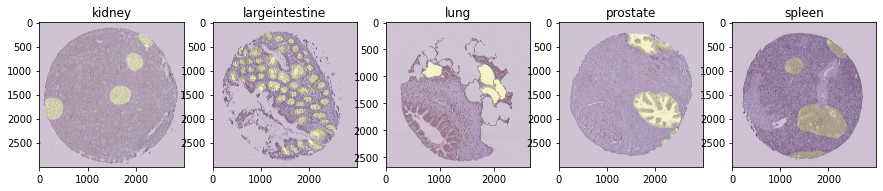

In [16]:
print("Original images with rle mask")

organs_df = train_df.groupby("organ").nth(-1).reset_index()
fig, ax = plt.subplots(1,len(organs_df),figsize=(15,8))

for _, row in organs_df.iterrows():
    image = plt.imread("../input/hubmap-organ-segmentation/train_images/"+str(row.id)+".tiff")
    mask = rle2mask(row.rle,shape=(row.img_height,row.img_width))
    ax[_].imshow(image)
    ax[_].imshow(mask,alpha=0.2)
    ax[_].set_title(row["organ"])

### *Adding more EDA and viz* ... 

## DO UPVOTE PLEASE!